## Installation
- Install python from [here](https://marketplace.visualstudio.com/items?itemName=ms-python.python)
- Install jupyter notebook from [here](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter)
- Download and install [mini conda](https://docs.conda.io/projects/miniconda/en/latest/)
- Install pandas library of python using the following command in command prompt
```cmd
pip install pandas
```
- Install matplotlib library of python using the following command in command prompt
```cmd
pip install matplotlib
```
- Install seaborn library of python using the following command in command prompt
```cmd
pip install seaborn
```
- Install numpy library of python using the following command in command prompt
```cmd
pip install numpy
```
- Install plotly library of python using the following command in command prompt
```cmd
pip install plotly
```

# Step 1: Importing the libraries
```python   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline import iplot
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Importing the dataset
```python
df = pd.read_csv('Dataset/netflix_data.csv')
```

In [2]:
url = 'Dataset/netflix_data.csv'
df = pd.read_csv(url, index_col=0)


# Step 3: Data Preprocessing
- `Data preprocessing` is the process of preparing (cleaning and organizing) the raw data to make it suitable for model training

In [3]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: ylabel='show_id'>

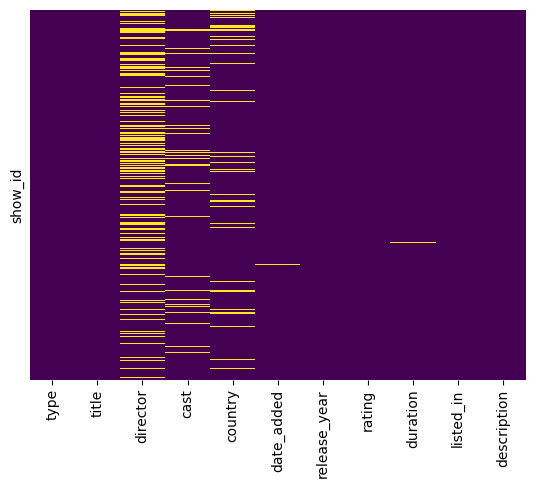

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
df.cast.fillna("cast unavailable", inplace=True)
df.country.fillna("production country unavailable", inplace=True)
df.director.fillna("director unavailable", inplace=True)

<Axes: ylabel='show_id'>

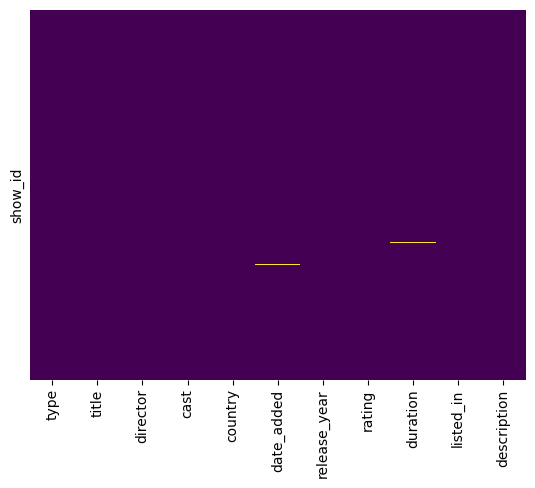

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Visualization
- We will use `matplotlib` and `seaborn` to visualize the data.

In [12]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [13]:
df['country'].value_counts()

country
United States                             2818
India                                      972
production country unavailable             831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [14]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [15]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [16]:
df[df.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


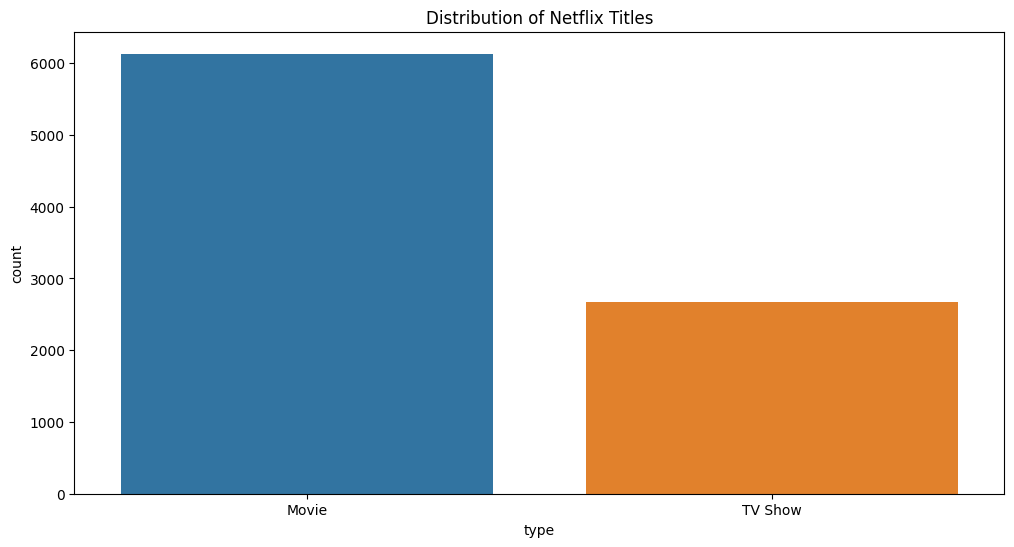

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Netflix Titles')
plt.show()


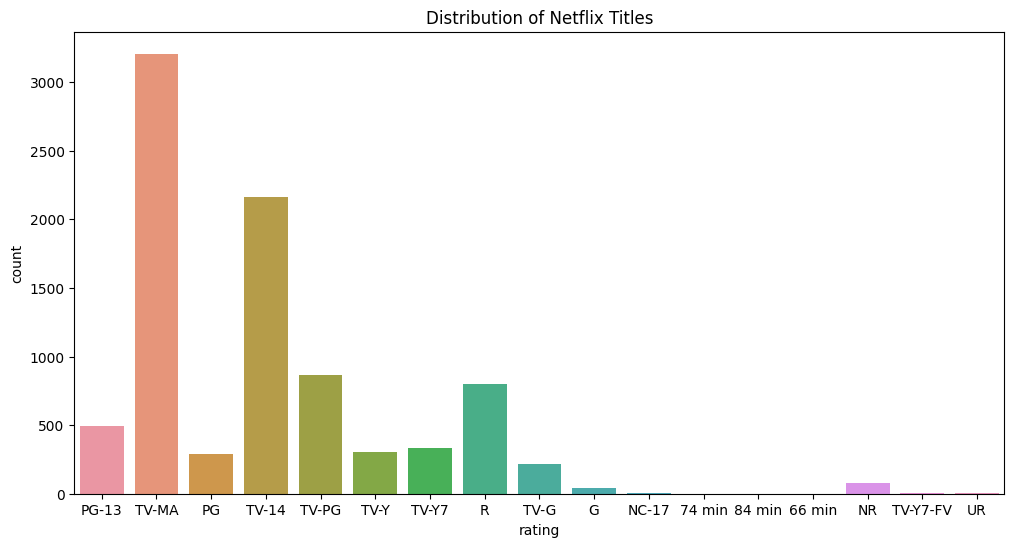

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Netflix Titles')
plt.show()


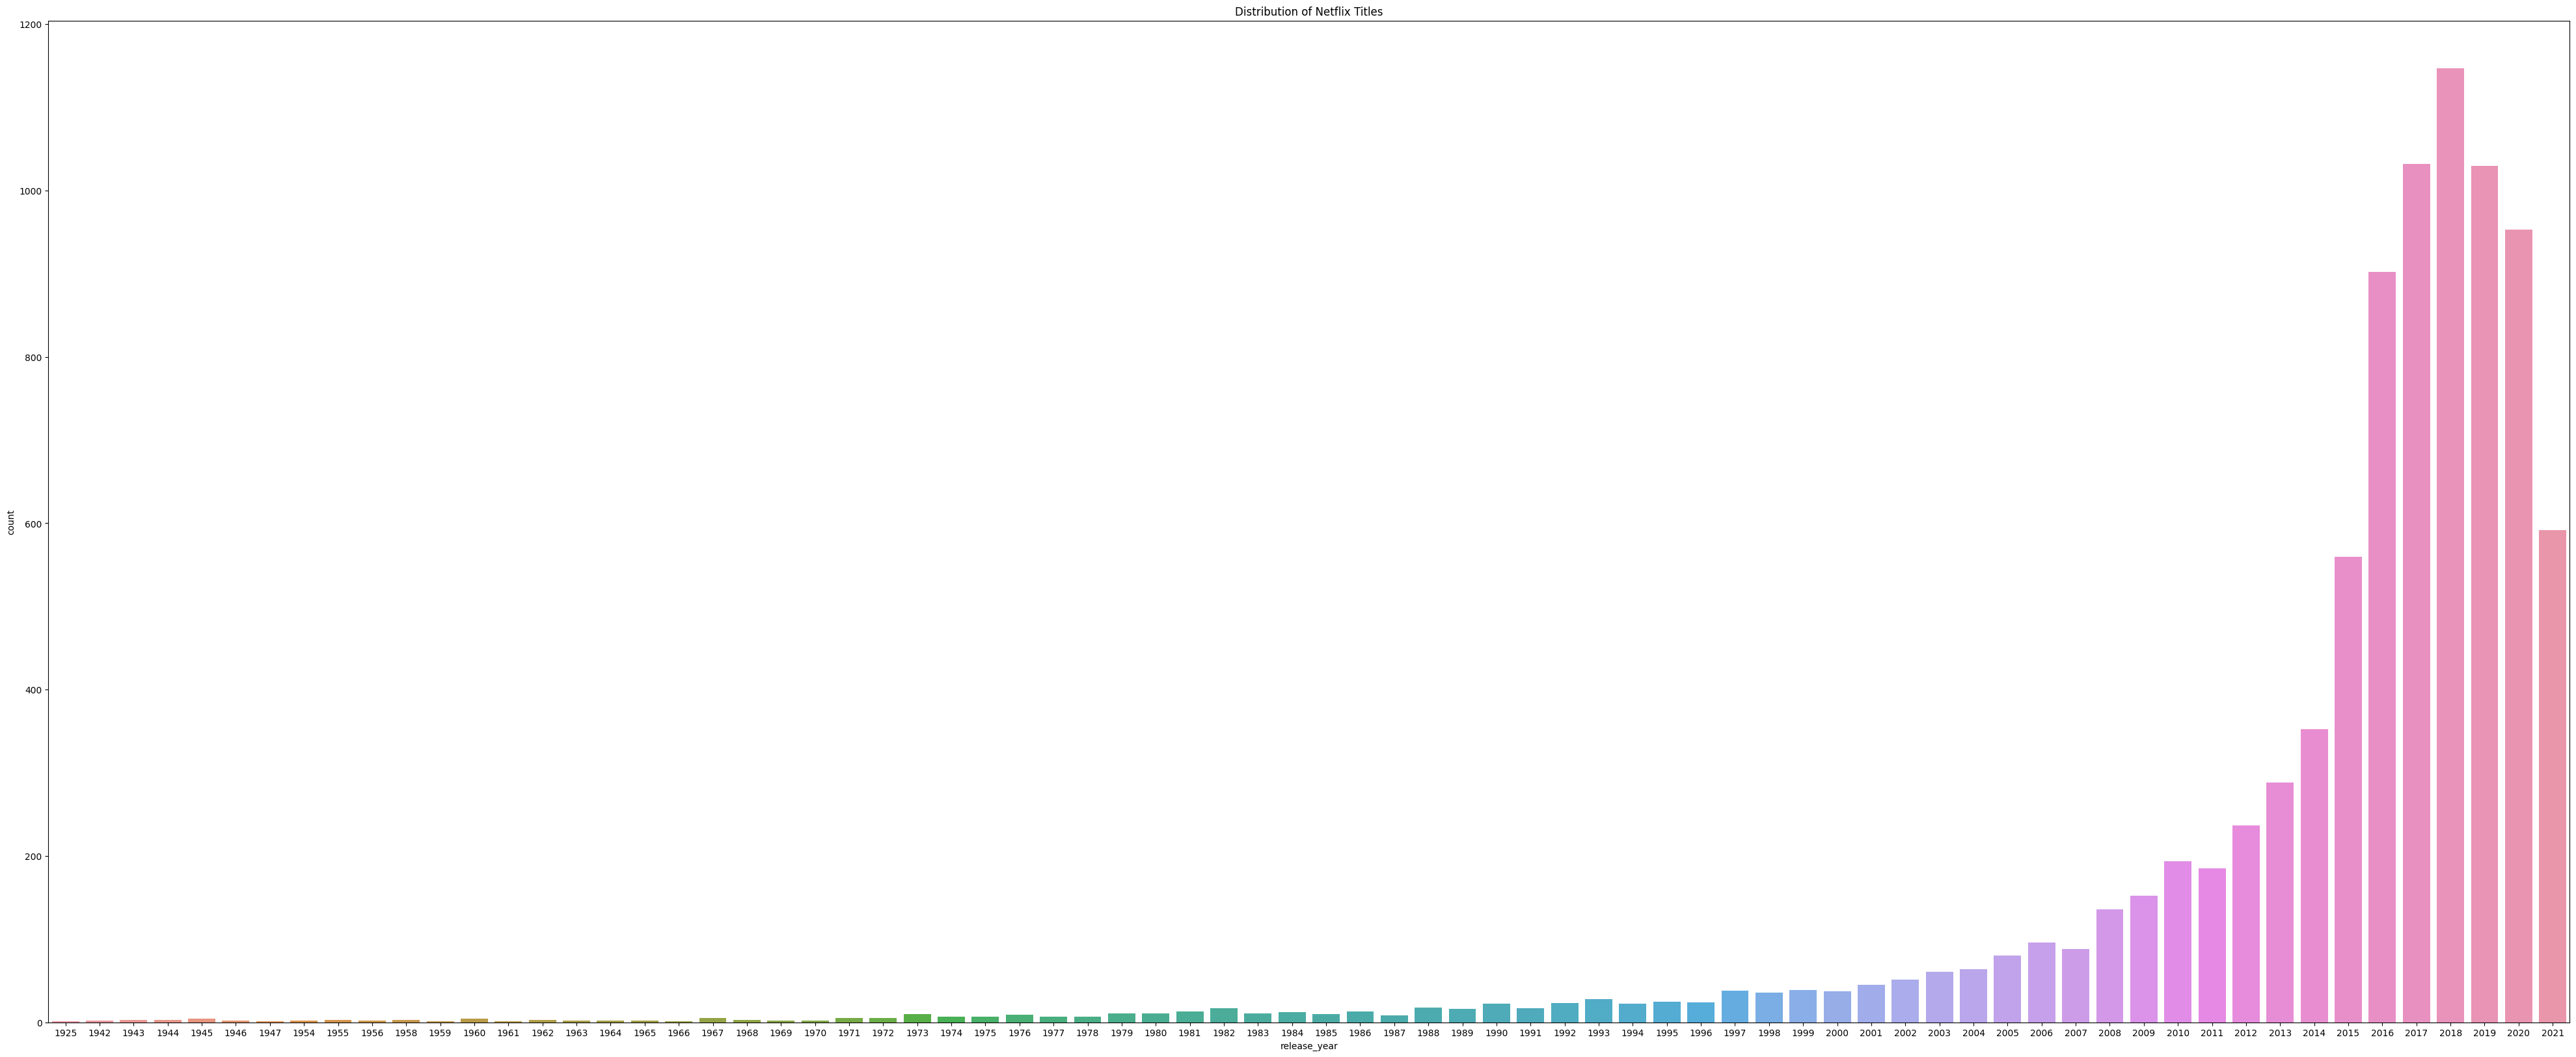

In [19]:
plt.figure(figsize=(50, 20))
sns.countplot(x='release_year', data=df)
plt.title('Distribution of Netflix Titles')
plt.show()

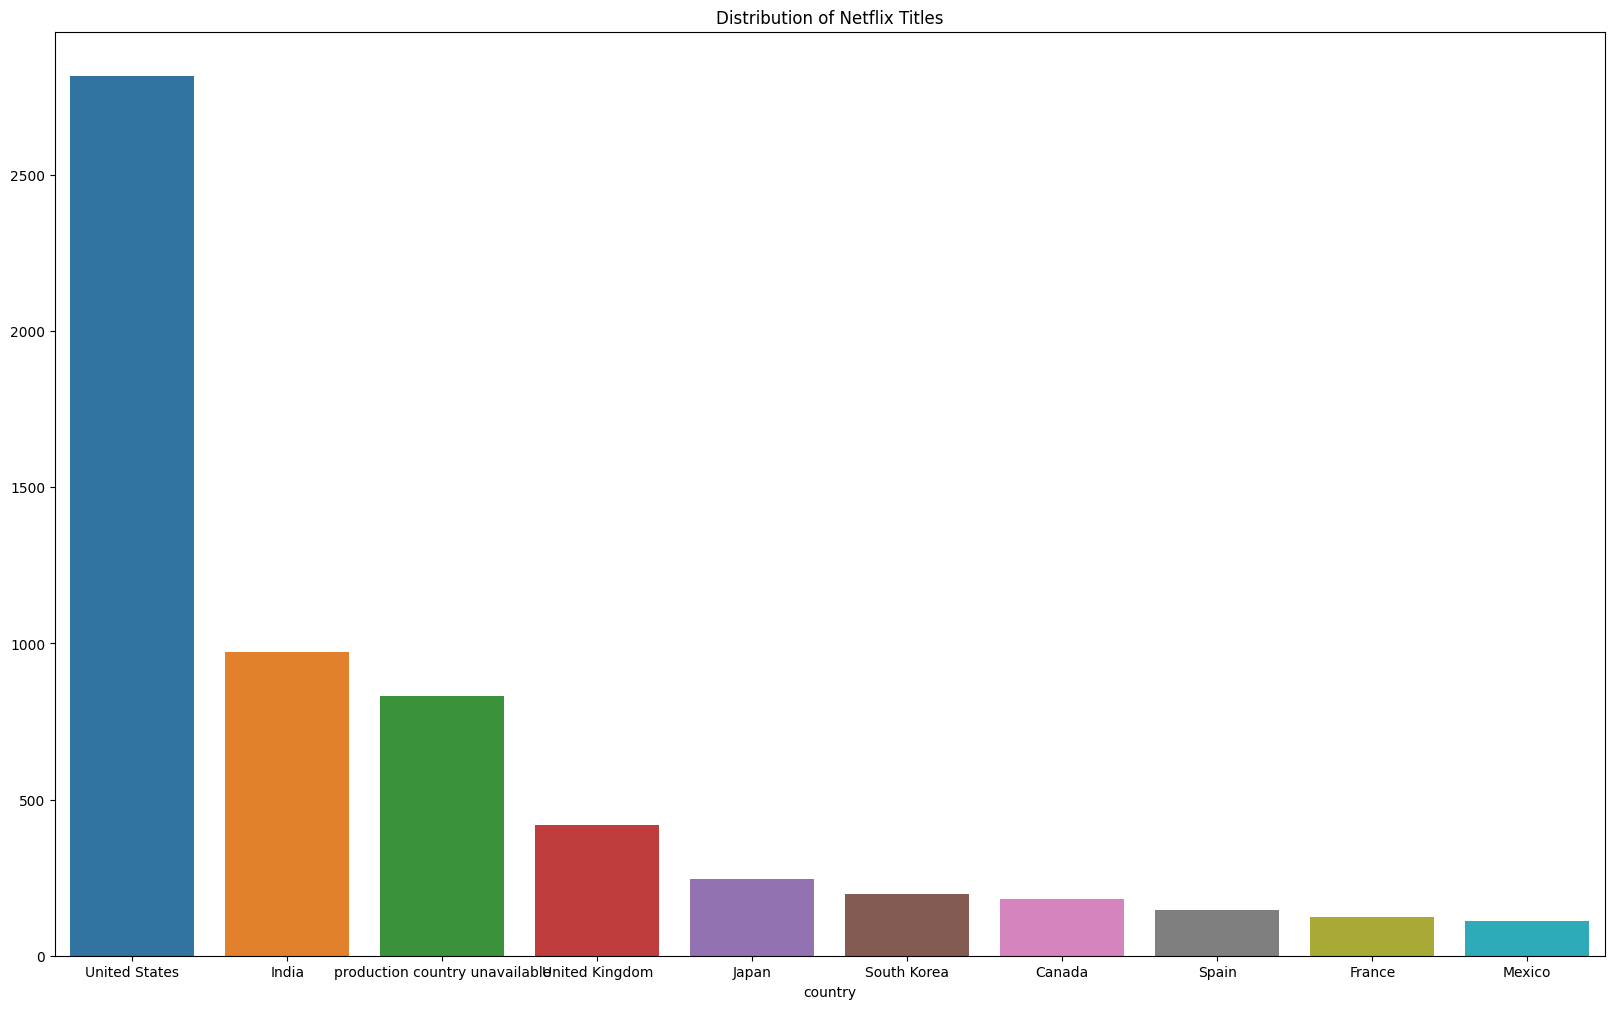

In [20]:
names = df['country'].value_counts().head(10).index
values = df['country'].value_counts().head(10).values

plt.figure(figsize=(20, 12))
sns.barplot(x=names, y=values)
plt.title('Distribution of Netflix Titles')
plt.show()

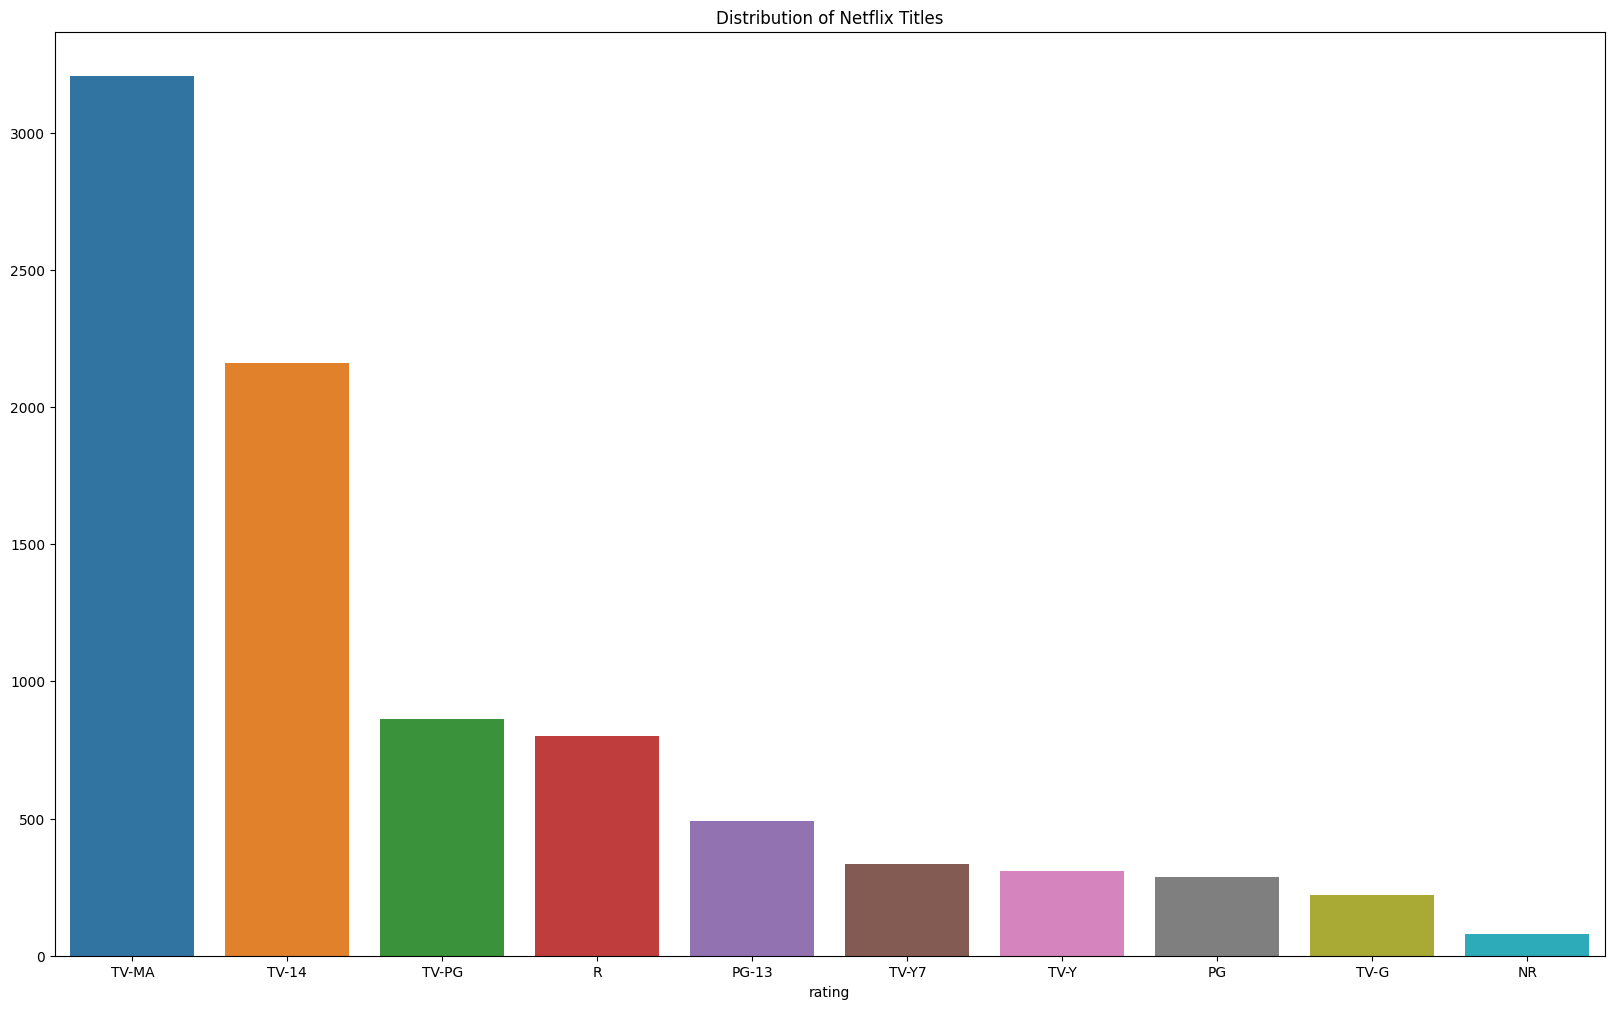

In [21]:
names = df['rating'].value_counts().head(10).index
values = df['rating'].value_counts().head(10).values

plt.figure(figsize=(20, 12))
sns.barplot(x=names, y=values)
plt.title('Distribution of Netflix Titles')
plt.show()

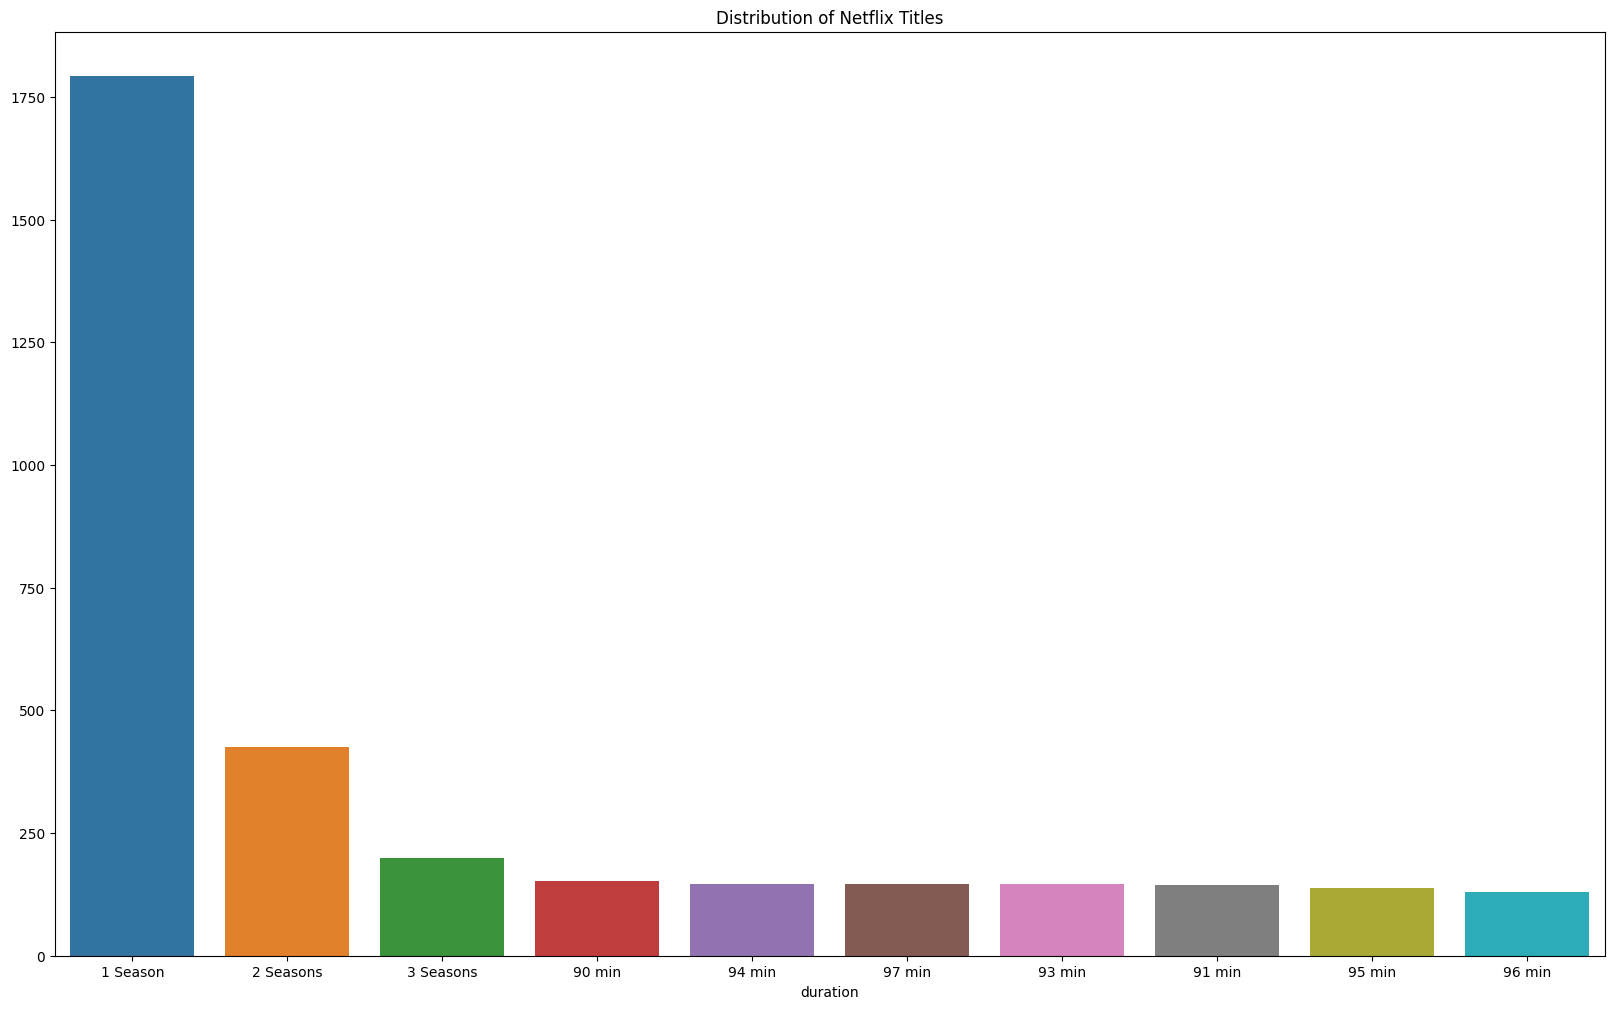

In [22]:
names = df['duration'].value_counts().head(10).index
values = df['duration'].value_counts().head(10).values

plt.figure(figsize=(20, 12))
sns.barplot(x=names, y=values)
plt.title('Distribution of Netflix Titles')
plt.show()

Text(0.5, 1.0, 'Top 10 Genres with the Largest Number of Content Titles')

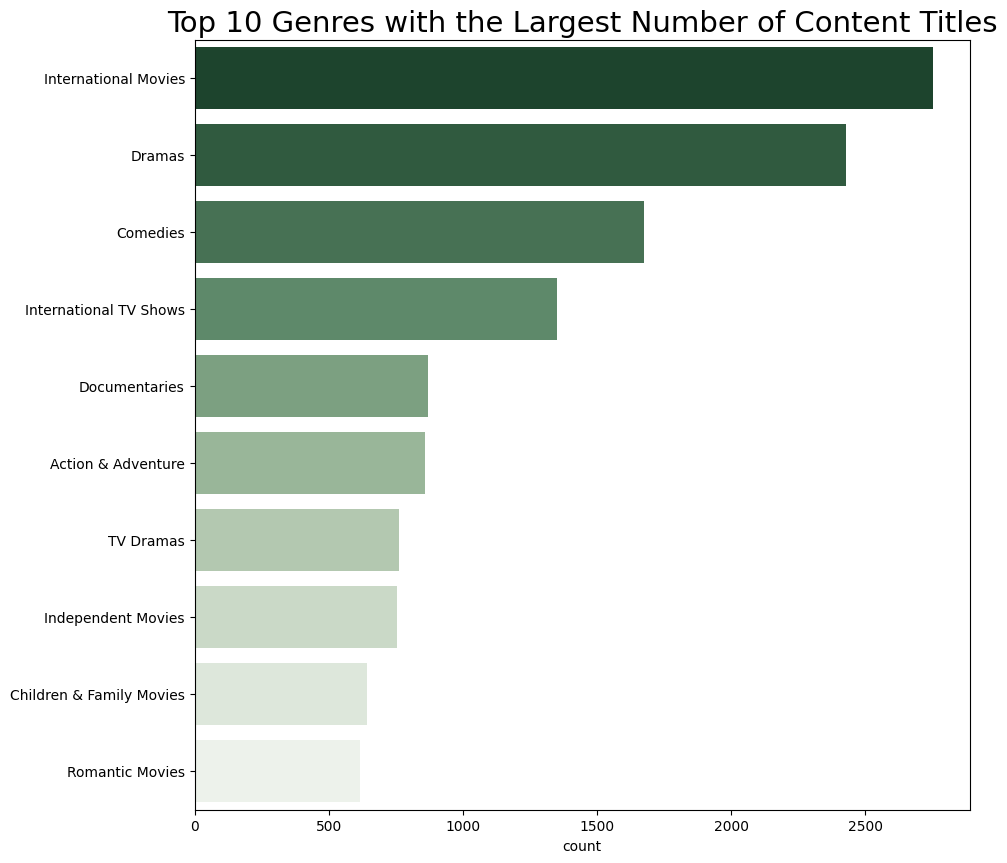

In [23]:
top_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10, 10))
sns.countplot(y=top_genres, order=top_genres.value_counts().index.to_list()[:10], palette='Greens_r', saturation=.4)
plt.title('Top 10 Genres with the Largest Number of Content Titles', fontsize=21)

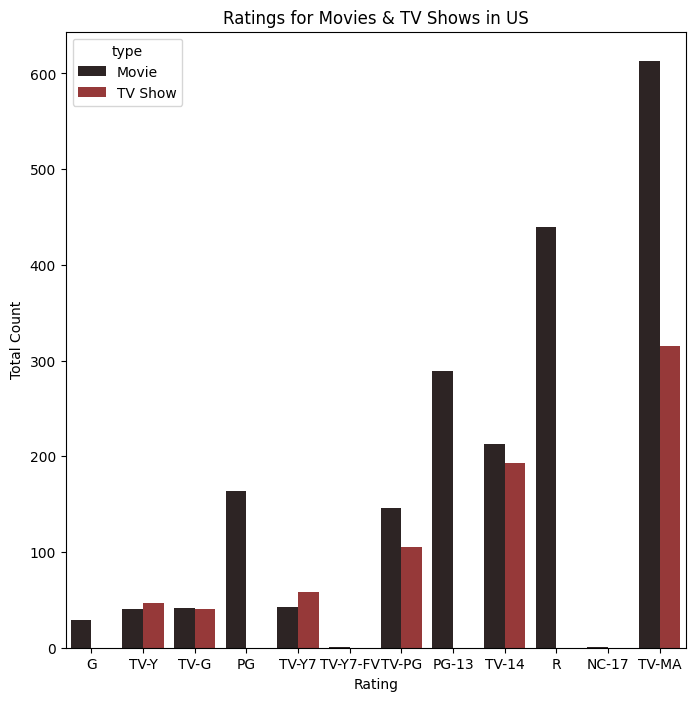

In [24]:
US = df[df.country == "United States"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(8,8))
g = sns.countplot(x=US.rating, hue=US.type, order=order, palette="dark:brown");
plt.title("Ratings for Movies & TV Shows in US")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

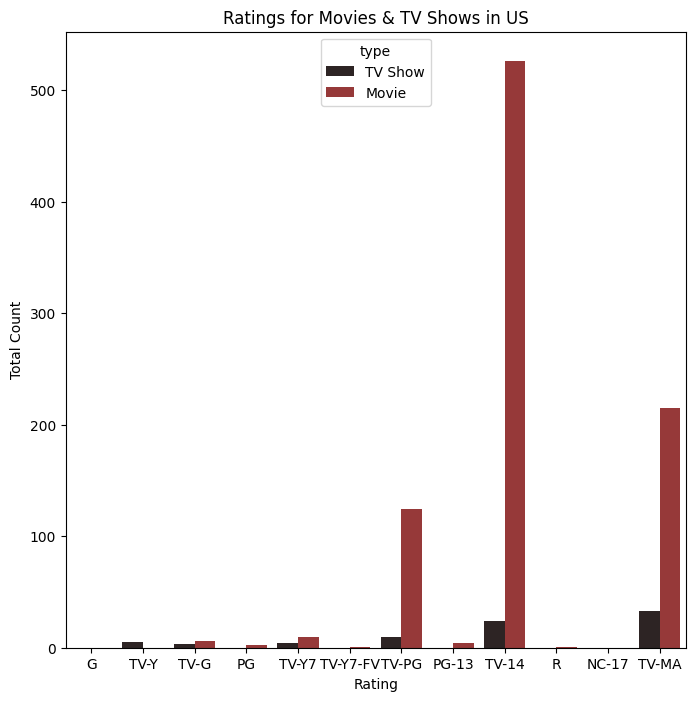

In [25]:
IN = df[df.country == "India"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(8,8))
g = sns.countplot(x=IN.rating, hue=IN.type, order=order, palette="dark:brown");
plt.title("Ratings for Movies & TV Shows in US")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

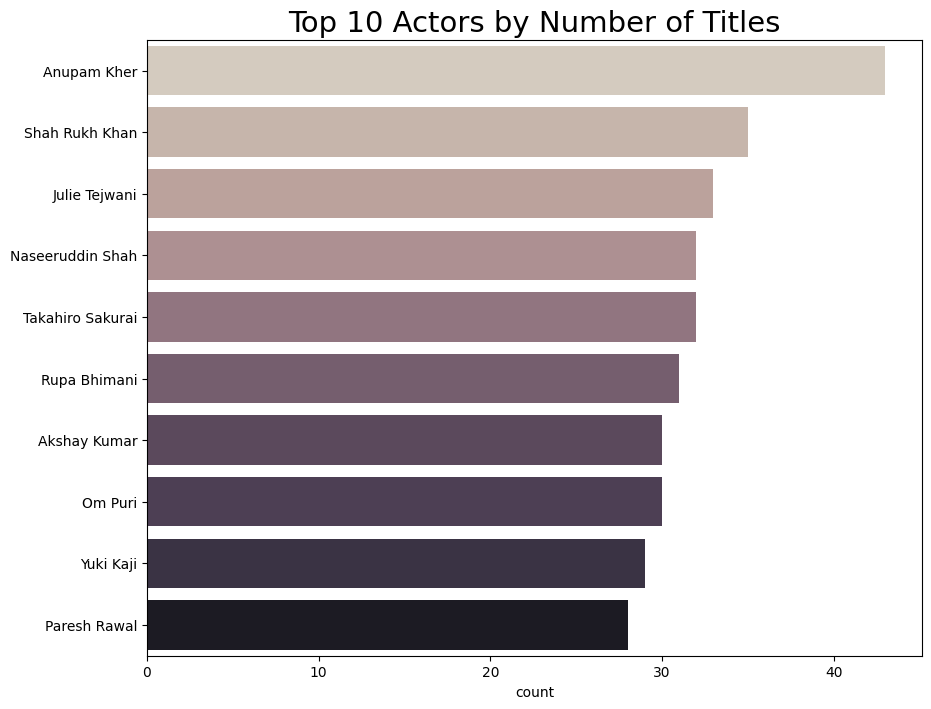

In [26]:
plt.figure(figsize=(10,8))
netflix_cast = df[df.cast != 'cast unavailable'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = netflix_cast, order=netflix_cast.value_counts().index[:10], palette='magma_r', saturation=.2)
plt.title('Top 10 Actors by Number of Titles', fontsize=21)
plt.show()

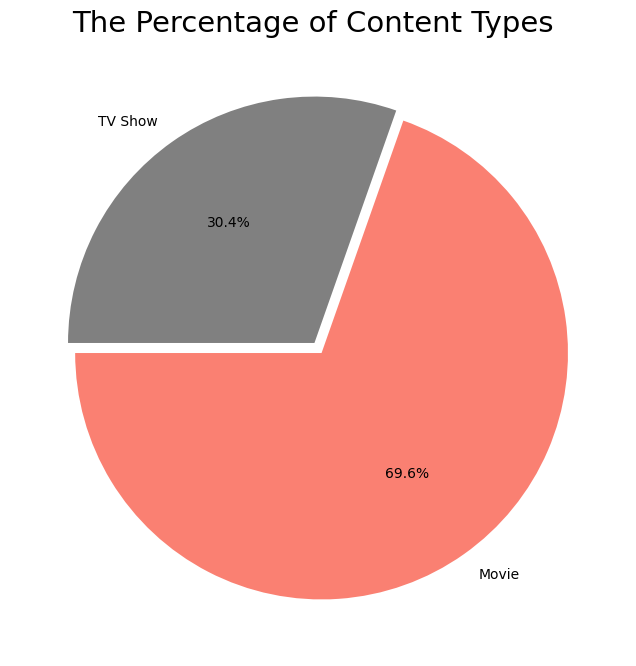

In [27]:
plt.figure(figsize=(12,8))
plt.title("The Percentage of Content Types ", fontsize=21)
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['salmon','grey'],  autopct='%1.1f%%', startangle=180)
plt.show()

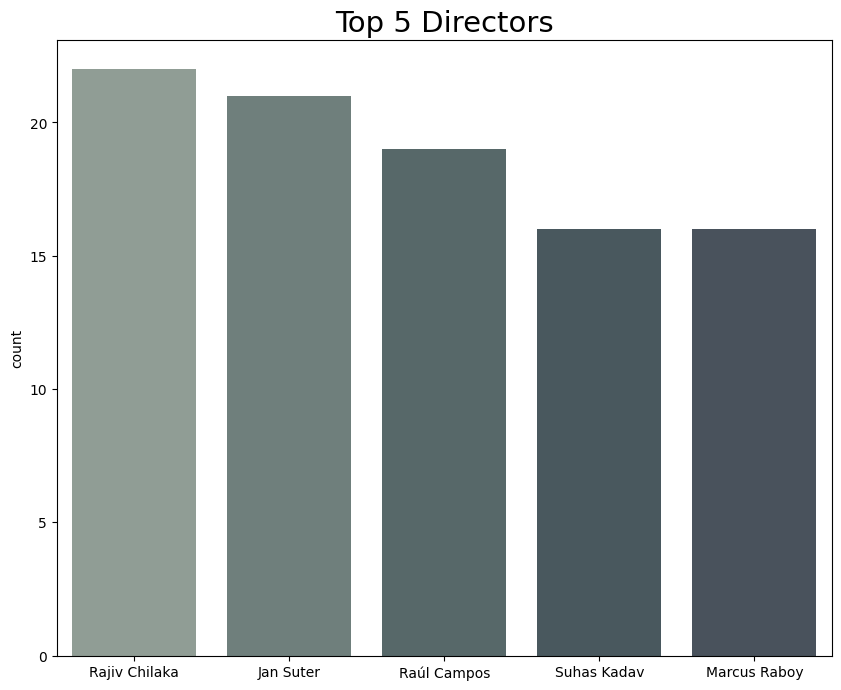

In [28]:
plt.figure(figsize=(10,8))
netflix_directors = df[df.director != 'director unavailable'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(x = netflix_directors, order=netflix_directors.value_counts().index[:5], palette='crest', saturation=.2)
plt.title('Top 5 Directors', fontsize=21)
plt.show()

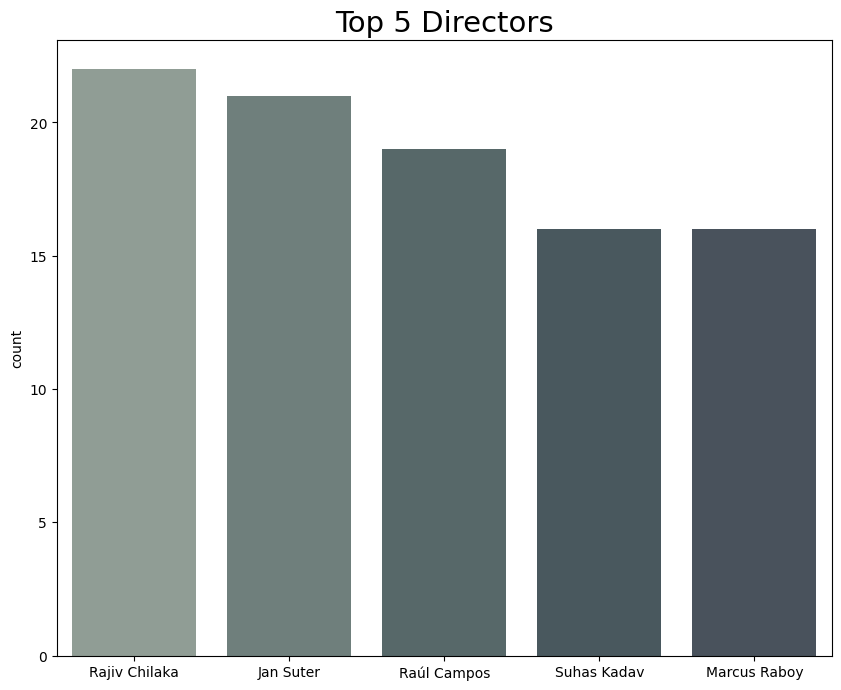

In [29]:
plt.figure(figsize=(10,8))
netflix_directors = df[df.director != 'director unavailable'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(x = netflix_directors, order=netflix_directors.value_counts().index[:5], palette='crest', saturation=.2)
plt.title('Top 5 Directors', fontsize=21)
plt.show()

# Step 4: Data Filtering
- We will filter the data to get the data of only by the specific type.


In [30]:
df[(df['type']=='Movie') & (df['release_year']==2020)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast unavailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",cast unavailable,production country unavailable,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",production country unavailable,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
s85,Movie,Omo Ghetto: the Saga,"JJC Skillz, Funke Akindele","Funke Akindele, Ayo Makun, Chioma Chukwuka Akp...",Nigeria,"September 10, 2021",2020,TV-MA,147 min,"Action & Adventure, Comedies, Dramas",Twins are reunited as a good-hearted female ga...
s104,Movie,Shadow Parties,Yemi Amodu,"Jide Kosoko, Omotola Jalade-Ekeinde, Yemi Blaq...",production country unavailable,"September 6, 2021",2020,TV-MA,117 min,"Dramas, International Movies, Thrillers",A family faces destruction in a long-running c...
...,...,...,...,...,...,...,...,...,...,...,...
s3047,Movie,All the Freckles in the World,Yibrán Asuad,"Hánssel Casillas, Loreto Peralta, Andrea Sutto...",Mexico,"January 3, 2020",2020,TV-14,90 min,"Comedies, International Movies, Romantic Movies",Thirteen-year-old José Miguel is immune to 199...
s3061,Movie,Ghost Stories,"Anurag Kashyap, Dibakar Banerjee, Karan Johar,...","Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel,...",India,"January 1, 2020",2020,TV-MA,145 min,"Horror Movies, International Movies, Thrillers","The directors of Emmy-nominated ""Lust Stories""..."
s5973,Movie,#cats_the_mewvie,Michael Margolis,cast unavailable,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...


In [31]:
from datetime import datetime
def convert_time(date):
    if isinstance(date, str):
        try:
             date_string =date.strip()
             return datetime.strptime(date,"%B %d, %Y")
        except ValueError:
             return None
         
    else:
        return None
    
df['date_added'] = df['date_added'].apply(convert_time)

In [32]:
df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [33]:
df['date_added'].dt.year.value_counts()

date_added
2019.0    1999
2020.0    1878
2018.0    1625
2021.0    1498
2017.0    1164
2016.0     418
2015.0      73
2014.0      23
2011.0      13
2013.0      10
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='date_added'>

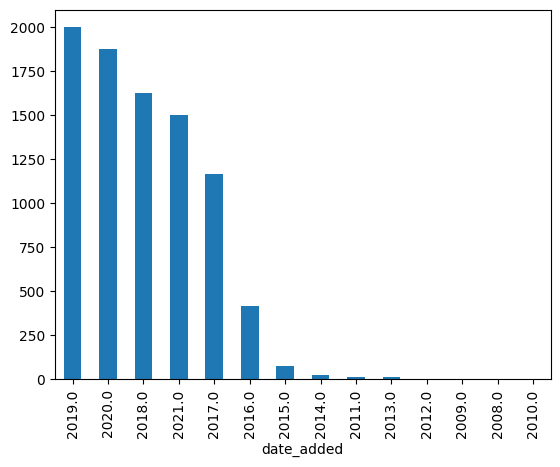

In [34]:
df['date_added'].dt.year.value_counts().plot(kind='bar')

In [35]:
df[(df['type']=='Movie') & (df['country']=='India')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2021-09-02,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
...,...,...,...,...,...,...,...,...,...,...,...
s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2017-05-01,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...


In [36]:
df[(df['type']=='Movie') & (df['listed_in']=='comedies') | (df['country']=='India')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5,TV Show,Kota Factory,director unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
s40,TV Show,Chhota Bheem,director unavailable,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
s51,TV Show,Dharmakshetra,director unavailable,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,director unavailable,cast unavailable,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
...,...,...,...,...,...,...,...,...,...,...,...
s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
s8776,TV Show,Yeh Meri Family,director unavailable,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."
s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...


In [37]:
df[(df['type']=='Movie') & (df['listed_in']=='Comedies')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,2021-09-01,2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...
s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,2021-09-01,2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...
s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,2021-08-01,1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...
s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States",2021-08-01,2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ..."
...,...,...,...,...,...,...,...,...,...,...,...
s8421,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...","United States, United Kingdom",2019-06-04,2009,R,94 min,Comedies,A journalist latches onto an unbelievable stor...
s8434,Movie,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",production country unavailable,2020-01-01,1991,PG-13,85 min,Comedies,Bumbling cop Frank Drebin is out to foil the b...
s8537,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,2017-12-12,2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...


In [38]:
df['cast'].value_counts()

cast
cast unavailable                                                                                                                                                                              825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                         

In [39]:
df[df['cast'].str.contains('Tom Cruise')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2021-03-01,1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


In [40]:
df.fillna('', inplace=True)

In [41]:
df[df['cast'].str.contains('Tom Cruise')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2021-03-01,1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


In [42]:
df['rating'].nunique()

18

In [43]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', '',
       'TV-Y7-FV', 'UR'], dtype=object)

In [44]:
df[(df['rating']=='PG-13') & (df['country']=='India')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1115,Movie,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,2021-04-01,2009,PG-13,164 min,"Comedies, Dramas, International Movies",While attending one of India's premier college...
s4694,Movie,Pad Man,R. Balki,"Akshay Kumar, Sonam Kapoor, Radhika Apte, Jyot...",India,2018-08-21,2018,PG-13,130 min,"Dramas, International Movies, Romantic Movies","Despite public humiliation and resistance, an ..."
s5152,Movie,Poster Boys,Shreyas Talpade,"Sunny Deol, Bobby Deol, Shreyas Talpade, Sonal...",India,2017-11-27,2017,PG-13,128 min,"Comedies, International Movies",Three men are stunned to find their faces on a...
s5184,Movie,Mubarakan,Anees Bazmee,"Anil Kapoor, Arjun Kapoor, Ileana D'Cruz, Athi...",India,2017-11-05,2017,PG-13,153 min,"Comedies, Dramas, International Movies",Chaos ensues after two orphaned twin brothers ...


In [45]:
df[(df['rating']=='PG-13') & (df['country']=='United States')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
s45,Movie,Jaws: The Revenge,Joseph Sargent,"Lorraine Gary, Lance Guest, Mario Van Peebles,...",United States,2021-09-16,1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers","After another deadly shark attack, Ellen Brody..."
...,...,...,...,...,...,...,...,...,...,...,...
s8758,Movie,World Trade Center,Oliver Stone,"Nicolas Cage, Michael Peña, Maggie Gyllenhaal,...",United States,2019-11-20,2006,PG-13,129 min,"Action & Adventure, Dramas","Working under treacherous conditions, an army ..."
s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,2020-01-01,1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...
s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...


In [46]:
df[(df['rating']=='PG-13') & (df['country']=='United States') & (df['type']=='Movie') & (df['release_year']>2018)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s296,Movie,The Paper Tigers,Quoc Bao Tran,"Alain Uy, Ron Yuan, Mykel Shannon Jenkins, Jae...",United States,2021-08-07,2021,PG-13,111 min,"Action & Adventure, Comedies","After reuniting as middle-aged men, three kung..."
s318,Movie,Pray Away,Kristine Stolakis,cast unavailable,United States,2021-08-03,2021,PG-13,102 min,"Documentaries, LGBTQ Movies","Ex-leaders and a survivor of the so-called ""co..."
s335,Movie,Five Feet Apart,Justin Baldoni,"Haley Lu Richardson, Cole Sprouse, Moisés Aria...",United States,2021-08-01,2019,PG-13,116 min,"Dramas, Romantic Movies",A teen with cystic fibrosis shakes up her dail...
s600,Movie,The Best of Enemies,Robin Bissell,"Taraji P. Henson, Sam Rockwell, Babou Ceesay, ...",United States,2021-07-01,2019,PG-13,133 min,Dramas,"In 1971, a summit on school integration in Nor..."
s686,Movie,Fatherhood,Paul Weitz,"Kevin Hart, Alfre Woodard, Lil Rel Howery, DeW...",United States,2021-06-18,2021,PG-13,111 min,Dramas,"A widowed new dad copes with doubts, fears, he..."
s775,Movie,2 Hearts,Lance Hool,"Jacob Elordi, Adan Canto, Radha Mitchell, Tier...",United States,2021-06-02,2020,PG-13,101 min,"Dramas, Faith & Spirituality, Romantic Movies","In parallel love stories, the lives of college..."
s1089,Movie,Thunder Force,Ben Falcone,"Melissa McCarthy, Octavia Spencer, Jason Batem...",United States,2021-04-09,2021,PG-13,107 min,"Action & Adventure, Comedies",Two childhood best friends reunite as an unlik...


In [47]:
#To change duration into numerical function 
df[['Minutes','Unit']] = df['duration'].str.split(' ',expand = True)

In [48]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
s2,TV Show,Blood & Water,director unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",production country unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
s4,TV Show,Jailbirds New Orleans,director unavailable,cast unavailable,production country unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
s5,TV Show,Kota Factory,director unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [49]:
df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Minutes                 object
Unit                    object
dtype: object

In [50]:
df['Minutes'].max()

'99'

In [51]:
df[(df['type']== 'Movie')& (df['listed_in']== "Dramas")].head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
show_id,,,,,,,,,,,,,
s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",production country unavailable,2021-09-03,2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ...",119,min
s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States",2021-09-01,2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...,108,min


In [52]:
df[(df['type']== 'TV Show')& (df['listed_in']== "Kids' TV")].head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
show_id,,,,,,,,,,,,,
s35,TV Show,Tayo and Little Wizards,director unavailable,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",production country unavailable,2021-09-17,2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,1,Season
s40,TV Show,Chhota Bheem,director unavailable,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",3,Seasons


In [53]:
df[(df['type']== 'Movie')& (df['listed_in']== "Dramas") | (df['type']=='TV Show') & (df['listed_in']=="Kids' TV")]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
show_id,,,,,,,,,,,,,
s35,TV Show,Tayo and Little Wizards,director unavailable,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",production country unavailable,2021-09-17,2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,1,Season
s40,TV Show,Chhota Bheem,director unavailable,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",3,Seasons
s66,TV Show,Numberblocks,director unavailable,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,2021-09-15,2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",6,Seasons
s90,TV Show,Mighty Raju,director unavailable,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",production country unavailable,2021-09-09,2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan...",4,Seasons
s101,TV Show,Tobot Galaxy Detectives,director unavailable,"Austin Abell, Travis Turner, Cole Howard, Anna...",production country unavailable,2021-09-07,2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,2019-03-02,2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,109,min
s8697,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India",2019-05-06,2011,PG-13,147 min,Dramas,"During World War I, the bond between a young E...",147,min
s8784,TV Show,Yoko,director unavailable,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",production country unavailable,2018-06-23,2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",1,Season
